# Clusters

In [16]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.metrics import silhouette_score
import itertools
import matplotlib.cm as cm 

%matplotlib inline
pd.set_option('display.max_columns', None)

In [17]:
df = pd.read_csv("clusters.csv")
df.head(5)

,Unnamed: 0,expediente,autoridadSancionadora,sancion,causa,dependencia,curp,genero,puesto,falta,multa,inhabilitacion,institucion,completa,escolaridad,experiencia,ingreso,moneda
0,0,EXP/e54203a9,OIC,ACTA ADMINISTRATIVA,ABUSO DE FUNCIONES,SECRETARIA DE HACIENDA Y CREDITO PUBLICO,TAKV710225HVZFDR01,FEMENINO,Secretario/a de Estado A,ENRIQUECIMIENTO OCULTO U OCULTAMIENTO DE CONFL...,NaN,NaN,CAMINOS Y PUENTES FEDERALES DE INGRESOS Y SERV...,True,"[{'tipoOperacion': 'AGREGAR', 'nivel': {'clave...","[{'tipoOperacion': 'AGREGAR', 'ambitoSector': ...",NaN,NaN
1,1,EXP/e54203a9,OIC,ACTA ADMINISTRATIVA,ABUSO DE FUNCIONES,SECRETARIA DE HACIENDA Y CREDITO PUBLICO,TAKV710225HVZFDR01,FEMENINO,Secretario/a de Estado A,ENRIQUECIMIENTO OCULTO U OCULTAMIENTO DE CONFL...,NaN,NaN,CAMINOS Y PUENTES FEDERALES DE INGRESOS Y SERV...,True,"[{'tipoOperacion': 'SIN_CAMBIOS', 'nivel': {'c...","[{'tipoOperacion': 'SIN_CAMBIOS', 'ambitoSecto...",1310230.0,MXN
2,2,EXP/e54203a9,OIC,ACTA ADMINISTRATIVA,ABUSO DE FUNCIONES,SECRETARIA DE HACIENDA Y CREDITO PUBLICO,TAKV710225HVZFDR01,FEMENINO,Secretario/a de Estado A,ENRIQUECIMIENTO OCULTO U OCULTAMIENTO DE CONFL...,NaN,NaN,CAMINOS Y PUENTES FEDERALES DE INGRESOS Y SERV...,True,"[{'tipoOperacion': 'SIN_CAMBIOS', 'nivel': {'c...","[{'tipoOperacion': 'SIN_CAMBIOS', 'ambitoSecto...",5315172.0,MXN
3,3,EXP/e54203a9,OIC,ACTA ADMINISTRATIVA,ABUSO DE FUNCIONES,SECRETARIA DE HACIENDA Y CREDITO PUBLICO,TAKV710225HVZFDR01,FEMENINO,Secretario/a de Estado A,ENRIQUECIMIENTO OCULTO U OCULTAMIENTO DE CONFL...,NaN,NaN,CAMINOS Y PUENTES FEDERALES DE INGRESOS Y SERV...,True,"[{'tipoOperacion': 'SIN_CAMBIOS', 'nivel': {'c...","[{'tipoOperacion': 'SIN_CAMBIOS', 'ambitoSecto...",5436864.0,MXN
4,4,EXP/e54203a9,OIC,ACTA ADMINISTRATIVA,ABUSO DE FUNCIONES,SECRETARIA DE HACIENDA Y CREDITO PUBLICO,TAKV710225HVZFDR01,FEMENINO,Secretario/a de Estado A,ENRIQUECIMIENTO OCULTO U OCULTAMIENTO DE CONFL...,NaN,NaN,CAMINOS Y PUENTES FEDERALES DE INGRESOS Y SERV...,True,"[{'tipoOperacion': 'SIN_CAMBIOS', 'nivel': {'c...","[{'tipoOperacion': 'SIN_CAMBIOS', 'ambitoSecto...",5175204.0,MXN


In [18]:
clust = df[["autoridadSancionadora", "sancion", "causa", "dependencia", "genero", "puesto", "ingreso"]]

In [19]:
clust.head()

,autoridadSancionadora,sancion,causa,dependencia,genero,puesto,ingreso
0,OIC,ACTA ADMINISTRATIVA,ABUSO DE FUNCIONES,SECRETARIA DE HACIENDA Y CREDITO PUBLICO,FEMENINO,Secretario/a de Estado A,NaN
1,OIC,ACTA ADMINISTRATIVA,ABUSO DE FUNCIONES,SECRETARIA DE HACIENDA Y CREDITO PUBLICO,FEMENINO,Secretario/a de Estado A,1310230.0
2,OIC,ACTA ADMINISTRATIVA,ABUSO DE FUNCIONES,SECRETARIA DE HACIENDA Y CREDITO PUBLICO,FEMENINO,Secretario/a de Estado A,5315172.0
3,OIC,ACTA ADMINISTRATIVA,ABUSO DE FUNCIONES,SECRETARIA DE HACIENDA Y CREDITO PUBLICO,FEMENINO,Secretario/a de Estado A,5436864.0
4,OIC,ACTA ADMINISTRATIVA,ABUSO DE FUNCIONES,SECRETARIA DE HACIENDA Y CREDITO PUBLICO,FEMENINO,Secretario/a de Estado A,5175204.0


In [20]:
columns_names = clust.columns.values
print(columns_names)

['autoridadSancionadora' 'sancion' 'causa' 'dependencia' 'genero' 'puesto'
 'ingreso']


In [21]:
clust['autoridadSancionadora'] = clust['autoridadSancionadora'].map({"OIC":0,
                                                                     "Tribunal":1,
                                                                     "Organo de Control Interno":2,
                                                                     "Contraloría Interna":3
                                                        })
clust['sancion'] = clust['sancion'].map({"ACTA ADMINISTRATIVA":0,
                                         "MULTADO":1,
                                         "SANCIÓN ECONÓMICA":2,
                                         "INHABILITADO":3,
                                         "INDEMNIZACIÓN RESARCITORIA":4,
                                         "DESTITUCION":5,
                                         "SUSPENSION":6
                                                        })
clust['causa'] = clust['causa'].map({"ABUSO DE FUNCIONES":0,
                                      "DESVÍO DE RECURSOS PÚBLICOS":1,
                                      "TRÁFICO DE INFLUENCIAS":2,
                                      "UTILIZACIÓN INDEBIDA DE INFORMACIÓN":3,
                                      "CONFLICTO DE INTERÉS":4,
                                      "COHECHO, ACEPTO BENEFICIO NO COMPRENDIDO EN SU REMUNERACIÓN COMO PERSONA SERVIDORA PÚBLICA":5,
                                      "PECULADO, AUTORIZO ACTOS PARA EL USO O APROPIACIÓN PARA SÍ DE RECURSOS PÚBLICOS SIN FUNDAMENTOS JURÍDICOS":6,
                                      "NEPOTISMO":7,
                                      "ENRIQUECIMIENTO OCULTO":8,
                                      "CONTRATACIÓN INDEBIDA":9
                                                        })
clust['genero'] = clust['genero'].map({"FEMENINO":0,
                                       "MASCULINO":1
                                                        })

clust['puesto'] = clust['puesto'].map({'Secretario/a de Estado A':0,
                                       'Jefe de Departamento':1,
                                       'Analista':2,
                                       'Director de Area':3,
                                       'Director General Paraestatal A':3,
                                       'Director General Paraestatal C':3,
                                       'Administrador':4,
                                       'Subadministrador':4,
                                       'Subdirector de Area':3,
                                       'Titular de Unidad':5,
                                       'Director General Adjunto':3,
                                       'Director General Paraestatal B':3,
                                       'Gobernador/a del Estado':6
                                                        })

C:\Users\syste\AppData\Local\Temp/ipykernel_6824/529904493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust['autoridadSancionadora'] = clust['autoridadSancionadora'].map({"OIC":0,
C:\Users\syste\AppData\Local\Temp/ipykernel_6824/529904493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust['sancion'] = clust['sancion'].map({"ACTA ADMINISTRATIVA":0,
C:\Users\syste\AppData\Local\Temp/ipykernel_6824/529904493.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [22]:
clust['dependencia'] = clust['dependencia'].map({'SECRETARIA DE HACIENDA Y CREDITO PUBLICO':1,
 'CONSEJO DE PROMOCION TURISTICA DE MEXICO S.A. DE C.V.':4,
 'ADMINISTRACION PORTUARIA INTEGRAL DE ENSENADA S.A. DE C.V.':4,
 'CENTRO DE INVESTIGACION CIENTIFICA DE YUCATAN A.C.':6,
 'SECRETARIA DE MEDIO AMBIENTE Y RECURSOS NATURALES':9,
 'REGISTRO AGRARIO NACIONAL':2,
 'SECRETARIA DE AGRICULTURA GANADERIA DESARROLLO RURAL PESCA Y ALIMENTACION':2,
 'COMISION NACIONAL DE LIBROS DE TEXTO GRATUITOS':6,
 'SERVICIOS DE ALMACENAMIENTO DEL NORTE S.A.':4,
 'COMISION NACIONAL PARA EL USO EFICIENTE DE LA ENERGIA':0,
 'CENTRO DE INVESTIGACION Y SEGURIDAD NACIONAL':10,
 'ADMINISTRACION PORTUARIA INTEGRAL DE COATZACOALCOS S.A. DE C.V.':12,
 'COMISION NACIONAL BANCARIA Y DE VALORES':8,
 'ARCHIVO GENERAL DE LA NACION':7,
 'ADMINISTRACION PORTUARIA INTEGRAL DE LAZARO CARDENAS S.A. DE C.V.':12,
 'INSTITUTO NACIONAL DE CARDIOLOGIA IGNACIO CHAVEZ':5,
 'INSTITUTO NACIONAL DE INVESTIGACIONES NUCLEARES':0,
 'FIDEICOMISO DE FOMENTO MINERO':11,
 'CENTRO NACIONAL DE EQUIDAD DE GENERO Y SALUD REPRODUCTIVA':5,
 'ADMINISTRACION FEDERAL DE SERVICIOS EDUCATIVOS EN EL DISTRITO FEDERAL':6,
 'ADMINISTRACION PORTUARIA INTEGRAL DE TAMPICO S.A. DE C.V.':12,
 'COMISION NACIONAL DE ARBITRAJE MEDICO':5,
 'CORPORACIÓN ÁNGELES VERDES':5,
 'ADMINISTRACION PORTUARIA INTEGRAL DE VERACRUZ S.A. DE C.V.':4,
 'CFE GENERACIÓN III':0,
 'TRANSPORTADORA DE SAL S.A. DE C.V.':12,
 'AGROASEMEX S.A.':2,
 'INSTITUTO MATIAS ROMERO DE ESTUDIOS DIPLOMATICOS':6,
 'AGENCIA NACIONAL DE SEGURIDAD INDUSTRIAL Y DE PROTECCIÓN AL MEDIO AMBIENTE DEL SECTOR HIDROCARBUROS':3,
 'PROCURADURIA FEDERAL DEL CONSUMIDOR':13,
 'COMISION PARA PREVENIR Y ERRADICAR LA VIOLENCIA CONTRA LAS MUJERES':10,
 'COLEGIO SUPERIOR AGROPECUARIO DEL ESTADO DE GUERRERO':6,
 'EL COLEGIO DE MEXICO A.C.':6,
 'CIATEQ A.C. CENTRO DE TECNOLOGIA AVANZADA':6,
 'AEROPUERTOS Y SERVICIOS AUXILIARES':4,
 'FIDEICOMISO PROMEXICO':8,
 'COMISION NACIONAL DE AREAS NATURALES PROTEGIDAS':9,
 'INSTITUTO MEXICANO DE LA RADIO':12,
 'INSTITUTO DE ECOLOGIA A.C. (INV)':9,
 'BANCO NACIONAL DEL EJERCITO FUERZA AEREA Y ARMADA S.N.C.':8,
 'COORDINACION NACIONAL DEL PROGRAMA DE DESARROLLO HUMANO OPORTUNIDADES':13,
 'AGENCIA MEXICANA DE COOPERACIÓN INTERNACIONAL PARA EL DESARROLLO':13,
 'FONDO DE GARANTIA Y FOMENTO PARA LAS ACTIVIDADES PESQUERAS':2,
 'HOSPITAL REGIONAL DE ALTA ESPECIALIDAD DE IXTAPALUCA':5,
 'FONATUR MANTENIMIENTO TURISTICO S.A. DE C.V.':4,
 'COMITÉ NACIONAL PARA EL DESARROLLO SUSTENTABLE DE LA CAÑA DE AZÚCAR':13,
 'INSTITUTO NACIONAL DE MIGRACION':10,
 'COMISION FEDERAL DE TELECOMUNICACIONES':12,
 'COMISION NACIONAL DE CULTURA FISICA Y DEPORTE':5,
 'PROCURADURIA FEDERAL DE LA DEFENSA DEL TRABAJO':13,
 'LICONSA S.A. DE C.V.':13,
 'SECRETARIA DE DESARROLLO AGRARIO TERRITORIAL Y URBANO':7,
 'EL COLEGIO DE LA FRONTERA SUR':6,
 'COLEGIO DE BACHILLERES':6,
 'INSTITUTO NACIONAL DE ESTUDIOS HISTORICOS DE LAS REVOLUCIONES DE MEXICO':6,
 'AEROPUERTO INTERNACIONAL DE LA CIUDAD DE MEXICO S.A. DE C.V.':4,
 'PEMEX-GAS Y PETROQUIMICA BASICA':0,
 'INSTITUTO FEDERAL DE ACCESO A LA INFORMACION PUBLICA':7,
 'SECRETARIA DE ENERGIA':0,
 'PRESIDENCIA DE LA REPUBLICA':7,
 'BANCO NACIONAL DE OBRAS Y SERVICIOS PUBLICOS S.N.C.':8,
 'SECRETARIA DE DESARROLLO SOCIAL':13,
 'SECRETARIA DE LA FUNCION PUBLICA':7,
 'INSTITUTO NACIONAL DE CIENCIAS PENALES':6,
 'BANCO NACIONAL DE CREDITO RURAL S.N.C.':8,
 'TALLERES GRAFICOS DE MEXICO':6,
 'FERROCARRIL DEL ISTMO DE TEHUANTEPEC S.A. DE C.V.':12,
 'CASA DE MONEDA DE MEXICO':8,
 'CONSEJO NACIONAL PARA PREVENIR LA DISCRIMINACION':5,
 'FONDO NACIONAL PARA EL FOMENTO DE LAS ARTESANIAS':14,
 'COMISION NACIONAL DEL AGUA':9,
 'ADMINISTRACION PORTUARIA INTEGRAL DE SALINA CRUZ S.A. DE C.V.':12,
 'CENTRO DE CAPACITACION CINEMATOGRAFICA A.C.':14,
 'CFE CORPORATIVO':0,
 'NOTIMEX S.A. DE C.V.':12,
 'COMISION NACIONAL DE ACUACULTURA Y PESCA':2,
 'SERVICIO DE PROTECCIÓN FEDERAL':10,
 'ADMINISTRACION PORTUARIA INTEGRAL DE TOPOLOBAMPO S.A. DE C.V.':12,
 'BANCO NACIONAL DE COMERCIO EXTERIOR S.N.C.':8,
 'APOYOS Y SERVICIOS A LA COMERCIALIZACION AGROPECUARIA':2,
 'CENTRO REGIONAL DE ALTA ESPECIALIDAD EN CHIAPAS':6,
 'HOSPITAL REGIONAL DE ALTA ESPECIALIDAD DE CIUDAD VICTORIA BICENTENARIO 2010':5,
 'BANCO DEL AHORRO NACIONAL Y SERVICIOS FINANCIEROS S N C':8,
 'TRIBUNAL SUPERIOR AGRARIO.':2,
 'COMISION NACIONAL DE SEGURIDAD NUCLEAR Y SALVAGUARDIAS':10,
 'SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQUERA':2,
 'FIDEICOMISO FONDO DE CAPITALIZACION E INVERSION DEL SECTOR RURAL':8,
 'CENTRO DE INVESTIGACION Y DOCENCIA ECONOMICAS A.C.':6,
 'CENTRO DE INVESTIGACION EN QUIMICA APLICADA':6,
 'INSTITUTO DE INVESTIGACIONES DR. JOSE MARIA LUIS MORA':6,
 'INSTITUTO MEXICANO DE LA JUVENTUD':5,
 'FONATUR CONSTRUCTORA S.A. DE C.V.':4,
 'NOTIMEX AGENCIA DE NOTICIAS DEL ESTADO MEXICANO':12,
 'FONDO DE INFORMACION Y DOCUMENTACION PARA LA INDUSTRIA':3,
 'COMISION DE APELACION Y ARBITRAJE DEL DEPORTE':14,
 'FIDEICOMISO PARA LA CINETECA NACIONAL':14,
 'HOSPITAL REGIONAL DE ALTA ESPECIALIDAD DE LA PENINSULA DE YUCATAN':5,
 'INSTITUTO NACIONAL DEL DERECHO DE AUTOR':14,
 'INSTITUTO NACIONAL DE CANCEROLOGIA':5,
 'INSTITUTO NACIONAL DE INVESTIGACIONES FORESTALES AGRICOLAS Y PECUARIAS':2,
 'UNIVERSIDAD PEDAGOGICA NACIONAL':6,
 'COMISION FEDERAL DE MEJORA REGULATORIA':7,
 'INSTITUTO NACIONAL DE SALUD PUBLICA':5,
 'FONDO DE CULTURA ECONOMICA':14,
 'COMISION NACIONAL DE LOS SALARIOS MINIMOS':13,
 'CENTRO DE ESTUDIOS SUPERIORES EN TURISMO':6,
 'SERVICIO GEOLOGICO MEXICANO':6,
 'HOSPITAL REGIONAL DE ALTA ESPECIALIDAD DEL BAJIO':5,
 'COMPAÑIA MEXICANA DE EXPLORACIONES S.A. DE C.V.':6,
 'COMISION NACIONAL DE LAS ZONAS ARIDAS':6,
 'ADMINISTRACION PORTUARIA INTEGRAL DE MANZANILLO S.A. DE C.V.':12,
 'TRIBUNAL FEDERAL DE CONCILIACION Y ARBITRAJE':4,
 'SERVICIOS AEROPORTUARIOS DE LA CIUDAD DE MEXICO S.A. DE C.V.':12,
 'FONDO DE OPERACION Y FINANCIAMIENTO BANCARIO A LA VIVIENDA':8,
 'FIDEICOMISO DE RIESGO COMPARTIDO':8,
 'PEMEX-REFINACION':0,
 'FONDO NACIONAL DE FOMENTO AL TURISMO':4,
 'ADMINISTRACION PORTUARIA INTEGRAL DE DOS BOCAS S.A. DE C.V.':12,
 'ADMINISTRACION PORTUARIA INTEGRAL DE ALTAMIRA S.A. DE C.V.':12,
 'FONDO ESPECIAL DE ASISTENCIA TECNICA Y GARANTIA PARA LOS CREDITOS AGROPECUARIOS':8,
 'INSTITUTO DE SEGURIDAD SOCIAL PARA LAS FUERZAS ARMADAS MEXICANAS':5,
 'INSTITUTO NACIONAL DE GERIATRÍA':5,
 'LABORATORIOS DE BIOLOGICOS Y REACTIVOS DE MEXICO S.A. DE C.V.':5,
 'CENTRO DE INVESTIGACIONES Y ESTUDIOS SUPERIORES EN ANTROPOLOGIA SOCIAL':6,
 'CFE SUMINISTRADOR DE SERVICIOS BÁSICOS':0,
 'COMPAÑIA OPERADORA DEL CENTRO CULTURAL Y TURISTICO DE TIJUANA S.A. DE C.V.':14,
 'CENTRO DE INVESTIGACIONES BIOLOGICAS DEL NOROESTE S.C.':6,
 'CENTRO NACIONAL DE EXCELENCIA TECNOLOGICA EN SALUD':5,
 'CENTRO DE INVESTIGACION Y DE ESTUDIOS AVANZADOS DEL INSTITUTO POLITECNICO NACIONAL':6,
 'I.I.I. SERVICIOS S.A. DE C.V.':4,
 'ADMINISTRACION PORTUARIA INTEGRAL DE PROGRESO S.A. DE C.V.':12,
 'CENTRO DE INVESTIGACION Y ASISTENCIA EN TECNOLOGIA Y DISEÑO DEL ESTADO DE JALISCO A.C.':6,
 'UNIVERSIDAD AUTONOMA METROPOLITANA':6,
 'INSTITUTO POTOSINO DE INVESTIGACION CIENTIFICA Y TECNOLOGICA A.C.':6,
 'CENTRO NACIONAL DE TRASPLANTES':5,
 'CENTRO NACIONAL DE METROLOGIA':9,
 'CONSEJO NACIONAL DE CIENCIA Y TECNOLOGIA':6,
 'SECRETARIA DE TURISMO':4,
 'COMISION DE OPERACION Y FOMENTO DE ACTIVIDADES ACADEMICAS DEL INSTITUTO POLITECNICO NACIONAL':6,
 'PATRONATO DE OBRAS E INSTALACIONES DEL INSTITUTO POLITECNICO NACIONAL':6,
 'COMISIÓN EJECUTIVA DE ATENCIÓN A VÍCTIMAS':10,
 'IMPRESORA Y ENCUADERNADORA PROGRESO S.A. DE C.V.':4,
 'INSTITUTO MEXICANO DE CINEMATOGRAFIA':14,
 'INSTITUTO MEXICANO DE LA PROPIEDAD INDUSTRIAL':3,
 'INSTITUTO DE ADMINISTRACION Y AVALUOS DE BIENES NACIONALES':8,
 'ADMINISTRACION PORTUARIA INTEGRAL DE PUERTO MADERO S.A. DE C.V.':12,
 'CENTRO NACIONAL DE CONTROL DE ENERGÍA':0,
 'FIDEICOMISO FONDO NACIONAL DE HABITACIONES POPULARES':8,
 'CFE TRANSMISIÓN':0,
 'INSTITUTO NACIONAL PARA EL FEDERALISMO Y EL DESARROLLO MUNICIPAL':13,
 'COMISIÓN NACIONAL DE HIDROCARBUROS':0,
 'CENTRO DE ENSEÑANZA TECNICA INDUSTRIAL.':6,
 'CFE DISTRIBUCIÓN':0,
 'CENTROS DE INTEGRACION JUVENIL A.C.':5,
 'CENTRO DE INVESTIGACION EN ALIMENTACION Y DESARROLLO A.C.':6,
 'TRIBUNALES UNITARIOS AGRARIOS':2,
 'INSTITUTO NACIONAL PARA LA EDUCACION DE LOS ADULTOS':6,
 'EL COLEGIO DE MICHOACAN A.C.':6,
 'CENTRO NACIONAL DE PLANEACION ANALISIS E INFORMACION PARA EL COMBATE A LA DELINCUENCIA':10,
 'INSTITUTO NACIONAL DE REHABILITACION':5,
 'FONDO ESPECIAL PARA FINANCIAMIENTOS AGROPECUARIOS':8,
 'SECCION MEXICANA DE LA COMISION INTERNACIONAL DE LIMITES Y AGUAS MEXICO-GUATEMALA-BELICE':10,
 'POLICIA FEDERAL':10,
 'PRODUCTORA NACIONAL DE BIOLOGICOS VETERINARIOS':5,
 'ADMINISTRACION PORTUARIA INTEGRAL DE GUAYMAS S.A. DE C.V.':12,
 'EXPORTADORA DE SAL S.A.DE C.V.':4,
 'SECRETARÍA EJECUTIVA DEL SISTEMA NACIONAL ANTICORRUPCIÓN':7,
 'CENTRO DE INVESTIGACION Y DESARROLLO TECNOLOGICO EN ELECTROQUIMICA S.C.':6,
 'FONDO DE EMPRESAS EXPROPIADAS DEL SECTOR AZUCARERO':2,
 'TRIBUNAL FEDERAL DE JUSTICIA FISCAL Y ADMINISTRATIVA CON SEDE EN EL DISTRITO FEDERAL':7,
 'SECRETARIA DE LA DEFENSA NACIONAL':10,
 'INSTITUTO NACIONAL DE MEDICINA GENOMICA':5,
 'COMISION FEDERAL PARA LA PROTECCION CONTRA RIESGOS SANITARIOS':5,
 'SECRETARIA GENERAL DEL CONSEJO NACIONAL DE POBLACION':13,
 'PREVENCION Y READAPTACION SOCIAL':5,
 'PETROLEOS MEXICANOS':0,
 'INSTITUTO NACIONAL DE NEUROLOGIA Y NEUROCIRUGIA DR. MANUEL VELASCO SUAREZ':5,
 'INSTITUTO DE SEGURIDAD Y SERVICIOS SOCIALES DE LOS TRABAJADORES DEL ESTADO':5,
 'INSTITUTO NACIONAL DE CIENCIAS MEDICAS Y NUTRICION SALVADOR ZUBIRAN (INV)':5,
 'INSTITUTO NACIONAL PARA LA EVALUACION DE LA EDUCACION':6,
 'FERROCARRILES NACIONALES DE MEXICO':12,
 'SECCION MEXICANA DE LA COMISION INTERNACIONAL DE LIMITES Y AGUAS MEXICO-ESTADOS UNIDOS DE AMERICA':9,
 'SECRETARIA DE ECONOMIA':13,
 'ESTUDIOS CHURUBUSCO AZTECA S.A.':6,
 'CENTRO NACIONAL PARA LA SALUD DE LA INFANCIA Y ADOLESCENCIA':5,
 'COLEGIO NACIONAL DE EDUCACION PROFESIONAL TECNICA':6,
 'CIATEC A.C. CENTRO DE INNOVACION APLICADA EN TECNOLOGIAS COMPETITIVAS':6,
 'FINANCIERA RURAL':8,
 'SECRETARIADO EJECUTIVO DEL SISTEMA NACIONAL ANTICORRUPCIÓN':7,
 'INSTITUTO NACIONAL DE LA ECONOMÍA SOCIAL':13,
 'COLEGIO DE POSTGRADUADOS':6,
 'COMISION NACIONAL PARA EL DESARROLLO DE LOS PUEBLOS INDIGENAS':13,
 'ADMINISTRACION DEL PATRIMONIO DE LA BENEFICENCIA PUBLICA':7,
 'INSTITUTO DE CAPACITACION Y PROFESIONALIZACION EN PROCURACION DE JUSTICIA FEDERAL':6,
 'INSTITUTO NACIONAL DE LA PESCA':2,
 'SERVICIO DE ADMINISTRACION Y ENAJENACION DE BIENES':8,
 'COMISION FEDERAL DE ELECTRICIDAD':0,
 'CFE GENERACIÓN V':0,
 'INSTITUTO PARA EL DESARROLLO TECNICO DE LAS HACIENDAS PUBLICAS':2,
 'SECRETARIADO EJECUTIVO DEL SISTEMA NACIONAL DE SEGURIDAD PUBLICA':10,
 'INSTITUTO DE INVESTIGACIONES ELECTRICAS':0,
 'P.M.I. COMERCIO INTERNACIONAL S.A. DE C.V.':4,
 'INSTITUTO NACIONAL DE PERINATOLOGIA ISIDRO ESPINOSA DE LOS REYES':5,
 'CENTRO NACIONAL DE PREVENCION DE DESASTRES':10,
 'INSTITUTO NACIONAL DE LAS PERSONAS ADULTAS MAYORES':5,
 'HOSPITAL REGIONAL DE ALTA ESPECIALIDAD DE OAXACA':5,
 'EL COLEGIO DE LA FRONTERA NORTE A.C.':6,
 'UNIVERSIDAD ABIERTA Y A DISTANCIA DE MÉXICO':6,
 'FONATUR PRESTADORA DE SERVICIOS S.A. DE C.V.':4,
 'CENTRO DE PRODUCCION DE PROGRAMAS INFORMATIVOS Y ESPECIALES':4,
 'ADMINISTRACION PORTUARIA INTEGRAL DE MAZATLAN S.A. DE C.V.':12,
 'INSTITUTO NACIONAL DE LAS MUJERES':10,
 'CENTRO NACIONAL PARA LA PREVENCIÓN Y EL CONTROL DE LAS ADICCIONES':5,
 'SECRETARIA DE RELACIONES EXTERIORES':7,
 'CENTRO DE INVESTIGACION EN GEOGRAFIA Y GEOMATICA ING. JORGE L. TAMAYO A.C.':6,
 'PROCURADURIA GENERAL DE LA REPUBLICA':7,
 'CENTRO DE INVESTIGACION CIENTIFICA Y DE EDUCACION SUPERIOR DE ENSENADA B.C.':6,
 'SERVICIOS A LA NAVEGACION EN EL ESPACIO AEREO MEXICANO':6,
 'INSTITUTO NACIONAL DE ASTROFISICA OPTICA Y ELECTRONICA':6,
 'COORDINACION GENERAL DE LA COMISION MEXICANA DE AYUDA A REFUGIADOS':5,
 'INSTITUTO NACIONAL DE DESARROLLO SOCIAL':13,
 'INSTITUTO FEDERAL DE TELECOMUNICACIONES':12,
 'SERVICIO NACIONAL DE INSPECCION Y CERTIFICACION DE SEMILLAS':2,
 'COMISION PARA LA REGULARIZACION DE LA TENENCIA DE LA TIERRA':7,
 'INSTITUTO DEL FONDO NACIONAL PARA EL CONSUMO DE LOS TRABAJADORES':8,
 'SECRETARIA DE GOBERNACION':7,
 'CENTRO NACIONAL DE CONTROL DE GAS NATURAL':0,
 'CAMINOS Y PUENTES FEDERALES DE INGRESOS Y SERVICIOS CONEXOS':12,
 'XE-IPN CANAL 11':12,
 'FONDO DE GARANTIA Y FOMENTO PARA LA AGRICULTURA GANADERIA Y AVICULTURA':2,
 'INSTITUTO POLITECNICO NACIONAL':6,
 'INSTITUTO MEXICANO DEL TRANSPORTE':12,
 'SOCIEDAD HIPOTECARIA FEDERAL S.N.C.':8,
 'CENTRO NACIONAL DE VIGILANCIA EPIDEMIOLOGICA Y CONTRTOL DE ENFERMEDADES':5,
 'AUTORIDAD FEDERAL PARA EL DESARROLLO DE LAS ZONAS ECONÓMICAS ESPECIALES':13,
 'CONSEJO NACIONAL DE FOMENTO EDUCATIVO':6,
 'CENTRO NACIONAL PARA LA PREVENCION Y CONTROL DEL VIH/SIDA':5,
 'EDUCAL S.A. DE C.V.':6,
 'SISTEMA NACIONAL PARA EL DESARROLLO INTEGRAL DE LA FAMILIA':5,
 'CONSEJO NACIONAL PARA LA CULTURA Y LAS ARTES':14,
 'COMISION NACIONAL DE VIVIENDA':13,
 'INSTITUTO NACIONAL DE LENGUAS INDIGENAS':13,
 'CENTRO DE INVESTIGACION EN MATEMATICAS A.C.':6,
 'CENTRO DE INGENIERIA Y DESARROLLO INDUSTRIAL':3,
 'CENTRO DE EVALUACION Y DESARROLLO HUMANO':6,
 'HOSPITAL INFANTIL DE MEXICO FEDERICO GOMEZ':5
})

C:\Users\syste\AppData\Local\Temp/ipykernel_6824/1676660989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust['dependencia'] = clust['dependencia'].map({'SECRETARIA DE HACIENDA Y CREDITO PUBLICO':1,


In [23]:
clust = clust.fillna(method ='ffill') 
clust = clust.dropna(axis=0)

In [24]:
clust.isnull().sum().sort_values(ascending=False)

autoridadSancionadora    0
sancion                  0
causa                    0
dependencia              0
genero                   0
puesto                   0
ingreso                  0
dtype: int64

In [25]:
clust.dtypes

autoridadSancionadora      int64
sancion                    int64
causa                      int64
dependencia              float64
genero                     int64
puesto                     int64
ingreso                  float64
dtype: object

In [26]:
clust = clust[["sancion", "causa", "dependencia", "genero", "ingreso", "puesto"]]

In [27]:
scaler = StandardScaler() 
scaled_c = scaler.fit_transform(clust) 
  
normalized_c = normalize(scaled_c) 
  
normalized_c = pd.DataFrame(normalized_c,columns=clust.columns) 

In [28]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_c) 
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2'] 
X_principal.head()

,P1,P2
0,-0.068448,-0.708929
1,-0.220145,-0.297060
2,-0.223376,-0.284409
3,-0.216314,-0.311748
4,-0.218531,-0.303286


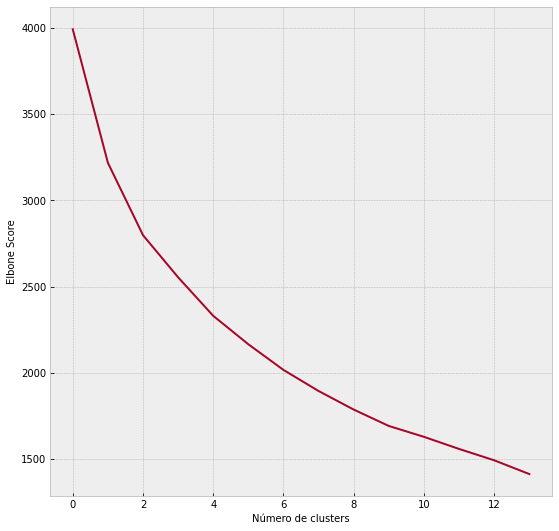

In [35]:
plt.style.use("bmh")
plt.figure(figsize=(9,9))

Sum_of_squared_distances = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km = km.fit(normalized_c)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(Sum_of_squared_distances, color='C1');
plt.xlabel('Número de clusters', fontsize = 10) 
plt.ylabel('Elbone Score', fontsize = 10) 
plt.savefig("elbone_score.jpg")

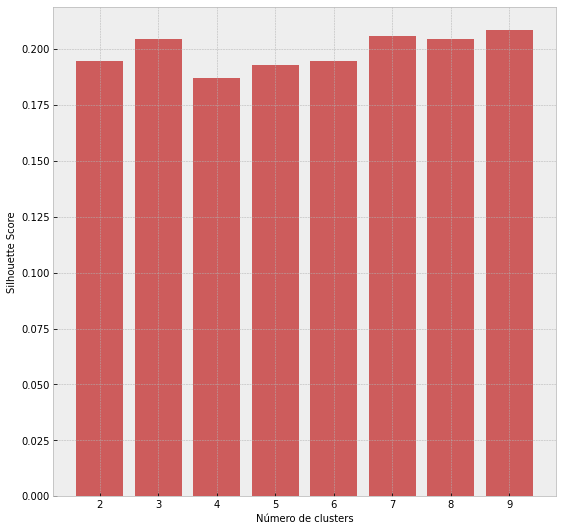

In [37]:
plt.style.use("bmh")
plt.figure(figsize=(9,9))

silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(normalized_c, KMeans(n_clusters = n_cluster).fit_predict(normalized_c))) 
    
# Plotting a bar graph to compare the results 
k = range(2,10)
plt.bar(k, silhouette_scores, color=['#CD5C5C']) 
plt.xlabel('Número de clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.savefig("silhouette_score.jpg")

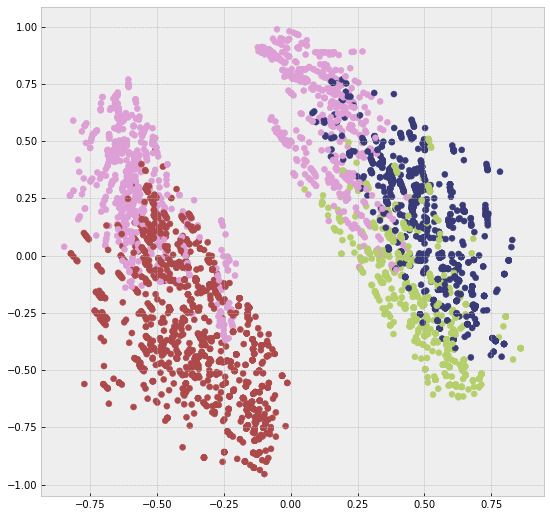

In [36]:
n_clusters = 4
plt.style.use("bmh")
plt.figure(figsize=(9,9))

km = KMeans(n_clusters=n_clusters)
km.fit(normalized_c);
plt.scatter(X_principal['P1'], X_principal['P2'], c = km.predict(normalized_c), cmap="tab20b");
plt.savefig("clusters.jpg")

In [17]:
clust["c"] = km.predict(normalized_c)
clust.head()

,sancion,causa,dependencia,genero,ingreso,puesto,c
1,0,0,1.0,0,1310230.0,0,2
2,0,0,1.0,0,5315172.0,0,1
3,0,0,1.0,0,5436864.0,0,1
4,0,0,1.0,0,5175204.0,0,1
5,0,0,1.0,0,5255676.0,0,1


In [18]:
#clust['autoridadSancionadora'] = clust['autoridadSancionadora'].map({0:"OIC",
 #                                                                    1:"Tribunal",
  #                                                                   2:"Organo de Control Interno",
   #                                                                  3:"Contraloría Interna"
    #                                                    })
clust['sancion'] = clust['sancion'].map({0:"Acta Administrativa",
                                         1:"Multa",
                                         2:"Sanción Económica",
                                         3:"Inhabilitación",
                                         4:"Indemnización Resarcitoria",
                                         5:"Destitución",
                                         6:"Susupención"
                                                        })
clust['causa'] = clust['causa'].map({0:"ABUSO DE FUNCIONES",
                                      1:"DESVÍO DE RECURSOS",
                                      2:"TRÁFICO DE INFLUENCIAS",
                                      3:"UTILIZACIÓN INDEBIDA DE INFORMACIÓN",
                                      4:"CONFLICTO DE INTERÉS",
                                      5:"COHECHO",
                                      6:"PECULADO",
                                      7:"NEPOTISMO",
                                      8:"ENRIQUECIMIENTO OCULTO",
                                      9:"CONTRATACIÓN INDEBIDA"
                                                        })
clust['genero'] = clust['genero'].map({0:"Mujer",
                                       1:"Hombre"
                                                        })
clust['dependencia'] = clust['dependencia'].map({
0:'Energía',
1:'Gasto Público',
2:'Agricultura',
3:'Industria',
4:'Servicios',
5:'Salud',
6:'Educación e Investigación',
7:'Gobernanza y Justicia',
8:'Banca y Finanzas',
9:'Medio Ambiente',
10:'Seguridad Nacional',
11:'Minería',
12:'Comunicación y Transporte',
13:'Economía y Desarrollo',
14:'Arte y Cultura'
                                                        })

clust['puesto'] = clust['puesto'].map({0:"Secretario de Estado",
                                       1:"Jefe Departamento",
                                       2:"Analista",
                                       3:"Director",
                                       4:"Administrador",
                                       5:"Titular",
                                       6:"Gobernador"
                                                       })
clust["value"]=1

In [19]:
clust.to_csv("cluster_fshiny.csv")

In [20]:
clust.head()

,sancion,causa,dependencia,genero,ingreso,puesto,c,value
1,Acta Administrativa,ABUSO DE FUNCIONES,Gasto Público,Mujer,1310230.0,Secretario de Estado,2,1
2,Acta Administrativa,ABUSO DE FUNCIONES,Gasto Público,Mujer,5315172.0,Secretario de Estado,1,1
3,Acta Administrativa,ABUSO DE FUNCIONES,Gasto Público,Mujer,5436864.0,Secretario de Estado,1,1
4,Acta Administrativa,ABUSO DE FUNCIONES,Gasto Público,Mujer,5175204.0,Secretario de Estado,1,1
5,Acta Administrativa,ABUSO DE FUNCIONES,Gasto Público,Mujer,5255676.0,Secretario de Estado,1,1
